# 1.상장법인 코드 추출하기

In [257]:
# 코스닥, 코스피 종목코드 yf에서 추출
import pandas as pd
import FinanceDataReader as fdr

In [93]:
stocks = fdr.StockListing('KRX')

In [146]:
stocks

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
8254,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
8255,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시
8256,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8257,429870,KOSPI,히어로즈 리츠이지스액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [147]:
stockcode = stocks[['Symbol', 'Market', 'Name']]

In [152]:
stockcode.head()

,Symbol,Market,Name
0,060310,KOSDAQ,3S
1,095570,KOSPI,AJ네트웍스
2,006840,KOSPI,AK홀딩스
3,054620,KOSDAQ,APS홀딩스
4,265520,KOSDAQ,AP시스템


In [198]:
# 해당하는 종목코드 추출
def code(stock):
    a = stockcode[stockcode['Name'] == stock]
    a_code = a['Symbol'].item()
    a_market = a['Market'].item()
    if a_market == 'KOSPI':
        a_market = '.KS'
    elif a_market == 'KOSDAQ':
        a_market = '.KQ'
    return a_code + a_market
    

# 2. 야후파이낸스에서 원하는 종목 수익률과 한달치 일별 수익률 변동 확인

In [267]:
import yfinance as yf
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib as plt

In [285]:
# 날짜: 자동으로 설정
# 티커: 함수이용

# 어제 수익률 보기
def yesterday_rtn(name):
    a = code(name)
    today = date.today()
    weekago = date.today() - relativedelta(weeks=1)
 
    df = yf.download(a, start=str(weekago), end=str(today), progess=False)
    df['daily_rtn'] = df['Adj Close'].pct_change()
    last_rtn = df['daily_rtn'][-1:].item()
    return last_rtn

# 한달동안 일별 수익률 추이 보기
def monthly_rtn_graph(name):
    a = code(name)
    today = date.today()
    monthago = date.today() - relativedelta(months=1)

    df = yf.download(a, start=str(monthago), end=str(today), progess=False)
    df['daily_rtn'] = df['Adj Close'].pct_change()

    return df['daily_rtn'].plot()

In [289]:
yesterday_rtn('삼성전자')

[*********************100%***********************]  1 of 1 completed


0.0014992503748125774

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

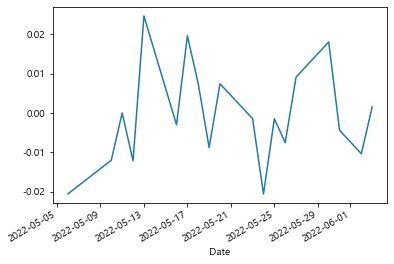

In [290]:
monthly_rtn_graph('삼성전자')

# 3. 한경컨센서스
